In [12]:
import os
import cv2
import numpy as np
import joblib
import json
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
# Define dataset paths
open_eye_path = "/Users/rafaelzieganpalg/Projects/SRP_Lab/Scopus_Proj/Dataset/Open_Eyes"
closed_eye_path = "/Users/rafaelzieganpalg/Projects/SRP_Lab/Scopus_Proj/Dataset/Closed_Eyes"

# Load images and labels
data, labels = [], []

def load_images_from_folder(folder, label):
    for file in os.listdir(folder):
        img_path = os.path.join(folder, file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load in grayscale
        if img is not None:
            img = cv2.resize(img, (64, 64))  # Resize for consistency
            data.append(img.flatten())  # Flatten image for SVM
            labels.append(label)

# Load both categories
load_images_from_folder(open_eye_path, label=0)  # 0 = Open Eye
load_images_from_folder(closed_eye_path, label=1)  # 1 = Closed Eye

# Convert to NumPy arrays
data = np.array(data)
labels = np.array(labels)

# Split dataset into train (80%) and validation (20%)
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42, stratify=labels)

print(f"Training Samples: {len(X_train)}, Validation Samples: {len(X_val)}")


Training Samples: 3200, Validation Samples: 800


In [18]:
# Initialize and train SVM model
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)

print("SVM Model trained successfully!")


SVM Model trained successfully!


Validation Accuracy: 0.9988

Classification Report:
               precision    recall  f1-score   support

    Open Eye       1.00      1.00      1.00       400
  Closed Eye       1.00      1.00      1.00       400

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



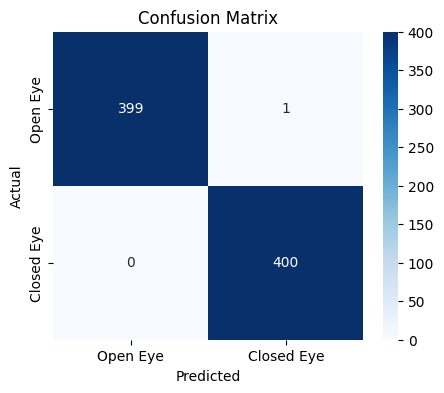

In [19]:
# Make predictions
y_pred = svm_model.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)

# Classification Report
class_report = classification_report(y_val, y_pred, target_names=["Open Eye", "Closed Eye"])

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred)

print(f"Validation Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", class_report)

# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Open Eye", "Closed Eye"], yticklabels=["Open Eye", "Closed Eye"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Confusion matrix saved to metrics/blink_confusion_matrix.png
Classification report saved to metrics/blink_classification_report.png


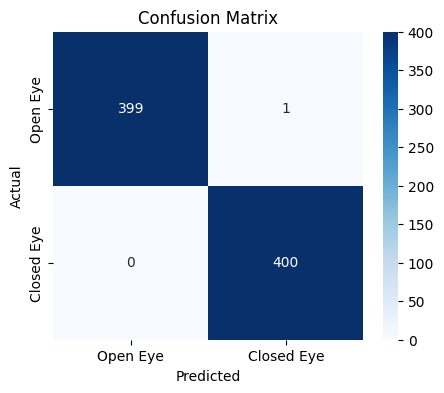

In [22]:
# Create folders if not exist
os.makedirs("models", exist_ok=True)
os.makedirs("metrics", exist_ok=True)

# Save Confusion Matrix as Image
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Open Eye", "Closed Eye"], yticklabels=["Open Eye", "Closed Eye"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
conf_matrix_path = "metrics/blink_confusion_matrix.png"
plt.savefig(conf_matrix_path)
print(f"Confusion matrix saved to {conf_matrix_path}")

# Save Classification Report as an Image
from io import BytesIO
import PIL.Image as Image
import PIL.ImageDraw as ImageDraw

# Convert classification report to an image
report_text = classification_report(y_val, y_pred, target_names=["Open Eye", "Closed Eye"])
img = Image.new('RGB', (600, 300), color='white')
draw = ImageDraw.Draw(img)
draw.text((10, 10), report_text, fill='black')

class_report_path = "metrics/blink_classification_report.png"
img.save(class_report_path)
print(f"Classification report saved to {class_report_path}")
